# 자연어 처리 기본 개념

## 공통 코드

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

#이미지를 저장할 때 사용하기 위한 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from matplotlib import font_manager, rc
import platform

#한글 출력을 위한 부분
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

#음수 출력을 위한 부분
mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

#그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수: 0.20 에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈령용 데이터가
# 자주 변경되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)

## 텍스트 전처리

### 토큰화 - 문장이나 단어 단위로 분리하는 것

In [2]:
#nltk 패키지의 punkt 서브 패키지 설치
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#문장 토큰화
text_sample = 'Hello World! Steve Jobs. 리처드 스톨만. 데니스 리치히,'
from nltk import sent_tokenize
sentences = sent_tokenize(text_sample)
print(sentences)

['Hello World!', 'Steve Jobs.', '리처드 스톨만.', '데니스 리치히,']


In [4]:
#단어 토큰화
sentence = '손으로 코딩하고 뇌로 컴파일하며 눈으로 디버깅한다\r\n품질은 양보다 중요하다 한 번의 홈런이 두 번의 더블보다 낫다.'
from nltk import word_tokenize
words = word_tokenize(sentence)
print(words)

['손으로', '코딩하고', '뇌로', '컴파일하며', '눈으로', '디버깅한다', '품질은', '양보다', '중요하다', '한', '번의', '홈런이', '두', '번의', '더블보다', '낫다', '.']


### 스톱 워드 제거

In [5]:
import nltk
nltk.download('stopwords')

print("불용어 개수:", len(nltk.corpus.stopwords.words('english')))
print("불용어:", nltk.corpus.stopwords.words('english')[:50])
stopwords = nltk.corpus.stopwords.words('english')
#print(type(stopwords))
stopwords.append('jobs')
print("불용어 개수:", len(stopwords))

불용어 개수: 179
불용어: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']
불용어 개수: 180


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#문장 토큰화
text_sample = 'I Love You Hello World! Steve Jobs. 리처드 스톨만. 데니스 리치히,'
sentences = sent_tokenize(text_sample)
wordtokens = [word_tokenize(sentence) for sentence in sentences]
#print(wordtokens)

#불용어를 제거한 단어들
all_tokens = []

for sentence in wordtokens:
    filtered_words = []
    for word in sentence:
        #영문의 경우는 대소문자
        lower_word = word.lower()
        if lower_word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
print(all_tokens)

[['Love', 'Hello', 'World', '!'], ['Steve', '.'], ['리처드', '스톨만', '.'], ['데니스', '리치히', ',']]


### 단어의 어근 찾기

In [7]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happy'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
stemmer = WordNetLemmatizer()

print(stemmer.lemmatize('working', 'v'), stemmer.lemmatize('works', 'v'), 
      stemmer.lemmatize('worked', 'v'))
print(stemmer.lemmatize('amusing', 'v'), stemmer.lemmatize('amuses', 'v'), 
      stemmer.lemmatize('amused', 'v'))
print(stemmer.lemmatize('happy', 'a'), stemmer.lemmatize('happiest', 'a'))
print(stemmer.lemmatize('fancier', 'a'), stemmer.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


work work work
amus amus amus
happy happiest
fant fanciest


[nltk_data]   Package wordnet is already up-to-date!


work work work
amuse amuse amuse
happy happy
fancy fancy


### COO 방식의 희소 행렬 표현

In [8]:
data = np.array([3, 1, 2])

row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

from scipy import sparse
sparse_coo = sparse.coo_matrix((data,(row_pos, col_pos)))
print(sparse_coo)

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2


### CSR 형식을 이용한 희소 행렬

In [9]:
dense_matrix = np.array([[0, 0, 1, 0, 0, 5], [1, 4, 0, 3, 2, 5],
                         [0, 6, 0, 6, 0, 0], [2, 0, 0, 0, 0, 0],
                         [0, 0, 0, 7, 0, 8], [1, 0, 0, 0, 0, 0]])
data = np.array([1, 5, 1, 4, 3, 2, 5, 6, 6, 2, 7, 8, 1])
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
row_pos_index = np.array([0, 2, 7, 9, 10, 12, 13])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])
#밀집 행렬로 변환
sparse_csr = sparse.csr_matrix((data, col_pos, row_pos_index))
print(sparse_csr.toarray())

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 6 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


### pytagcloud를 이용한 wordcloud

pygame 2.5.1 (SDL 2.28.2, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
[('SQL', 12), ('자바', 10), ('C++', 9), ('GO', 9), ('JavaScript', 9), ('파이썬', 8), ('코틀린', 8), ('C#', 7), ('러스트', 6), ('Scala', 4)]
[{'color': (77, 143, 20), 'size': 68, 'tag': 'SQL'}, {'color': (173, 99, 109), 'size': 59, 'tag': '자바'}, {'color': (179, 84, 208), 'size': 54, 'tag': 'C++'}, {'color': (183, 122, 185), 'size': 54, 'tag': 'GO'}, {'color': (157, 45, 211), 'size': 54, 'tag': 'JavaScript'}, {'color': (176, 100, 70), 'size': 50, 'tag': '파이썬'}, {'color': (90, 86, 35), 'size': 50, 'tag': '코틀린'}, {'color': (210, 133, 131), 'size': 45, 'tag': 'C#'}, {'color': (69, 82, 95), 'size': 40, 'tag': '러스트'}, {'color': (214, 109, 17), 'size': 29, 'tag': 'Scala'}]


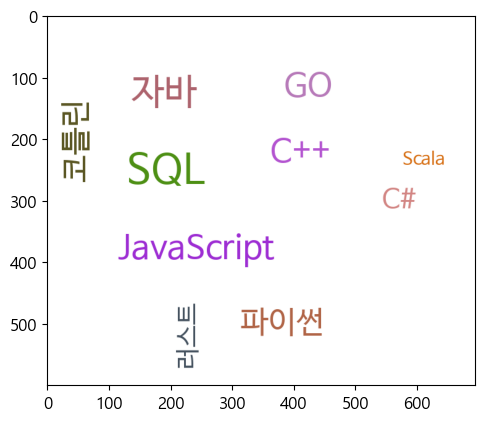

In [10]:
import pytagcloud
import collections

nouns = []

nouns.extend(['파이썬' for t in range(8)])
nouns.extend(['자바' for t in range(10)])
nouns.extend(['C++' for t in range(9)])
nouns.extend(['코틀린' for t in range(8)])
nouns.extend(['GO' for t in range(9)])
nouns.extend(['러스트' for t in range(6)])
nouns.extend(['C#' for t in range(7)])
nouns.extend(['JavaScript' for t in range(9)])
nouns.extend(['Scala' for t in range(4)])
nouns.extend(['SQL' for t in range(12)])

#데이터 개수 세기 - list 에서 데이터 개수 세기
count = collections.Counter(nouns)
'''
for x in count:
    print(x, count[x])
'''

#가장 많이 등장한 것의 개수를 설정해서 가져오기
tag = count.most_common(10)
print(tag)

#태그 목록 만들기
taglist = pytagcloud.make_tags(tag, maxsize=50)
print(taglist)

#태그 클라우드 생성
pytagcloud.create_tag_image(taglist, 'wordcloud.png', 
                           size=(900, 600), fontname="Korean",
                           rectangular=False)

#화면 출력
import matplotlib.pyplot
import matplotlib.image
img = matplotlib.image.imread('wordcloud.png')
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

### wordcloud 패키지를 이용한 이미지 안에 워드클라우드 출력

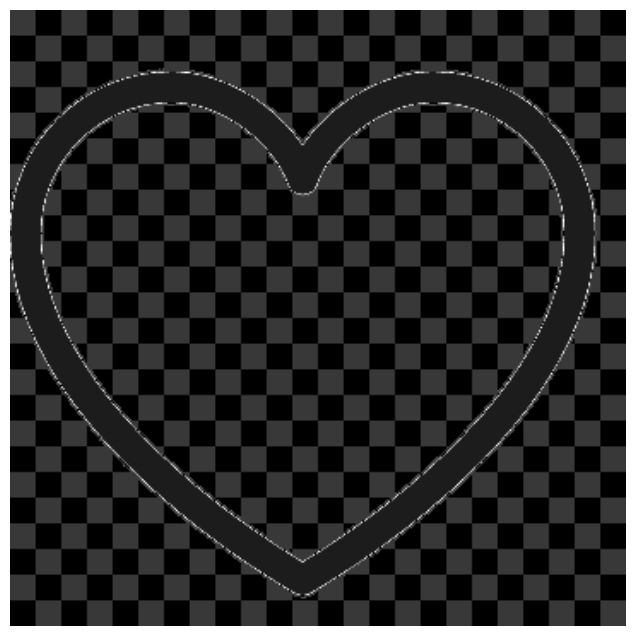

In [11]:
from PIL import Image

mask = np.array(Image.open('./data/heart.png'))
plt.figure(figsize=(8, 8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

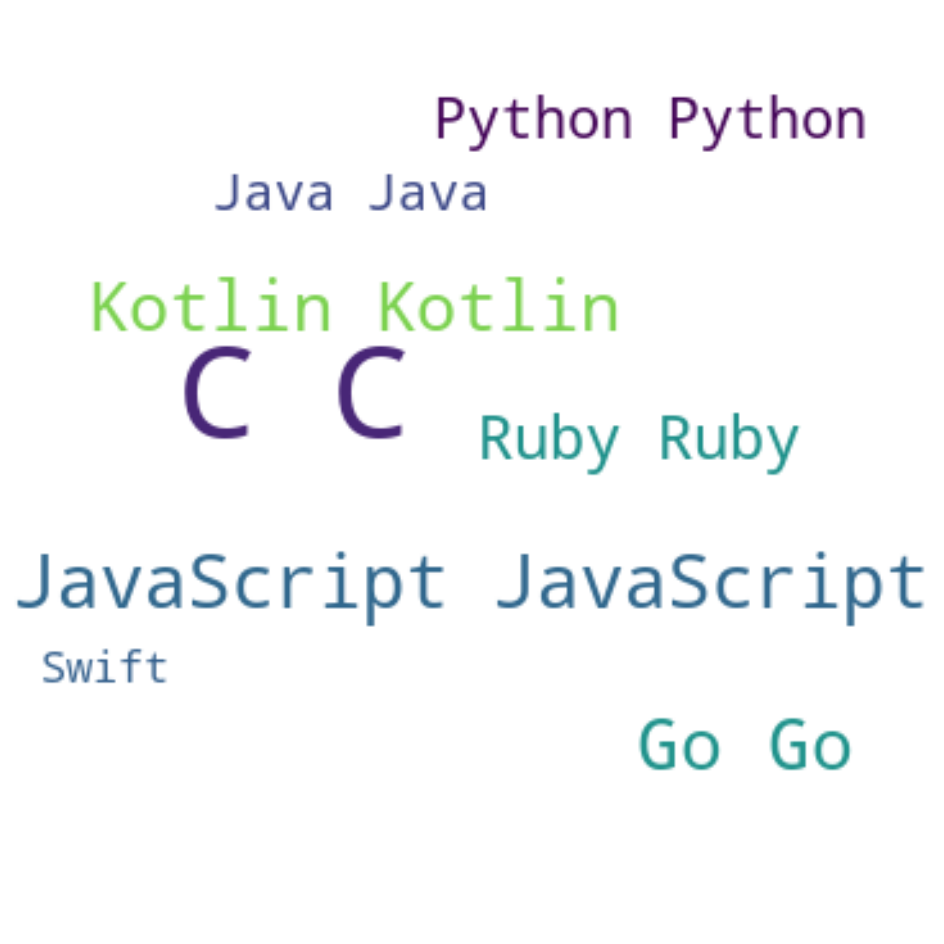

In [12]:
#문자열 만들기
text = ''

for i in range(8):
    text = text + 'Python '
for i in range(11):
    text = text + 'C '
for i in range(7):
    text = text + 'Java '
for i in range(12):
    text = text + 'Go '
for i in range(11):
    text = text + 'Kotlin '
for i in range(4):
    text = text + 'Swift '
for i in range(9):
    text = text + 'Ruby '
for i in range(7):
    text = text + 'C# '
for i in range(7):
    text = text + 'Solidity '
for i in range(13):
    text = text + 'JavaScript '
#print(text)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add('Solidity')

wordcloud = WordCloud(background_color = 'white', max_words=2000,
                     mask=mask, stopwords=stopwords)
wordcloud = wordcloud.generate(text)
#wordcloud.words_

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 동아일보에서 검색한 내용을 가지고 WordCloud 만들기

In [13]:
#Web의 정적 컨텐츠를 다운로드 받기 위한 패키지
import requests
from urllib.parse import quote

#HTML 파싱을 위한 패키지
from bs4 import BeautifulSoup

keyword = input('검색어:')
target_URL = 'https://www.donga.com/news/search?p=1&query=' + quote(keyword) + '&check_news=91&more=1&sorting=1&search_date=1&v1=&v2='
source_code = requests.get(target_URL)
#print(source_code.text)

#HTML 파싱 객체 생성
bs = BeautifulSoup(source_code.text, 'html.parser')

#파싱
tags = bs.select('div.cntPage > span') #선택자는 중복이 가능하기 때문에 list로 리턴
count = int(tags[0].getText()[0:-1].replace(',', ''))
print('기사 건수:', count)

KeyboardInterrupt: Interrupted by user

In [ ]:
#실제 크롤링 할 기사 건수 입력받기
read_cnt = int(input("읽을 기사 건수:"))
if read_cnt > count:
    read_cnt = count
#읽을 페이지 개수 생성
page_num = int(read_cnt / 15 + 0.95)
print(page_num)

In [ ]:
#다운로드 받은 텍스트를 저장할 파일을 개방
output_file = open(keyword + '.txt', 'w', encoding='utf8')

for i in range(page_num):
    current_p = 1 + i * 15
    target_URL = 'https://www.donga.com/news/search?p=' + str(current_p) + '&query=' + quote(keyword) + '&check_news=1&more=1&sorting=1&search_date=1&v1=&v2='
    #print(target_URL)
    
    #각 검색 페이지의 데이터를 읽어옵니다.
    source_code = requests.get(target_URL)
    #기사의 링크를 가져와야 합니다.
    bs = BeautifulSoup(source_code.text, 'html.parser')
    
    links = bs.select('span.tit > a')
    #print(links)
    for link in links:
        title_link = link['href']
        #print(title_link)
        #상세 기사 링크에 접속해서 html 가져오기
        source_code = requests.get(title_link)
        bs = BeautifulSoup(source_code.text, 'html.parser')
        articles = bs.select('#article_txt')
        if articles != None:
            for article in articles:
                #print(article.getText())
                string_item = str(article.find_all(text=True))
                output_file.write(string_item)
                
output_file.close()

In [ ]:
#한글 형태소 분석기를 활용해서 한글 텍스트를 추출
from konlpy.tag import Twitter
open_text_file = open(keyword + ".txt", 'r', encoding='utf8')
text = open_text_file.read()
spliter = Twitter()
nouns = spliter.nouns(text)
open_text_file.close()
print(nouns)

In [ ]:
#단어 개수 와 등장 횟수 확인
import nltk
ko = nltk.Text(nouns, name=keyword)
print('전체 단어 개수:', len(ko.tokens))
print('전체 단어 개수 - 중복 제거:', len(set(ko.tokens)))
print(ko.vocab())
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [ ]:
#불용어 제거
stop_words = ['이미지', '공유', '것', '유관순', '등']
ko_1 = [each_word for each_word in ko if each_word not in stop_words]
ko_2 = [each_word for each_word in ko_1 if len(each_word) > 1]
print(ko_2)

In [ ]:
ko = nltk.Text(ko_2, name=keyword)
plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [ ]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(relative_scaling=0.5, font_path='./data/NanumBarunGothic.ttf',
                     background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
data = ko.vocab().most_common(150)
mask = np.array(Image.open('./data/appleBar.png'))
wordcloud = WordCloud(relative_scaling=0.5, font_path='./data/NanumBarunGothic.ttf',
                     background_color='white', mask=mask).generate_from_frequencies(dict(data))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 뉴스 그룹 분류

#### 데이터 가져오기

In [ ]:
# 데이터 가져오기
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=42)
#sklearn에서는 datasets 서브 패키지를 이용해서 가져온 데이터는 dict
#가져온 데이터의 key를 확인 
print(news_data.keys())

In [ ]:
#print(news_data.filenames)
#print(news_data.target_names) #target의 클래스 이름
#print(news_data.DESCR) #데이터에 대한 설명

In [ ]:
#분포 확인
print(pd.Series(news_data.target).value_counts().sort_index())

In [ ]:
print(news_data.target_names)

In [ ]:
#데이터 확인
print(news_data.data[0])

In [ ]:
#데이터 가져오기

#headers 나 footers, quotes를 제거하고 훈련 데이터 가져오기
train_news = fetch_20newsgroups(subset='train', 
                                remove=('headers', 'footers', 'quotes'),
                               random_state=42)
#훈련 데이터 생성
X_train = train_news.data
y_train = train_news.target #실제 데이터에서 이게 없으면 군집
print(type(X_train)) #문자열의 list

#headers 나 footers, quotes를 제거하고 훈련 데이터 가져오기
test_news = fetch_20newsgroups(subset='test', 
                                remove=('headers', 'footers', 'quotes'),
                               random_state=42)
#훈련 데이터 생성
X_test = test_news.data
y_test = test_news.target #실제 데이터에서 이게 없으면 군집
print(type(X_test)) #문자열의 list

#### 피처 벡터화

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#단어가 등장한 개수 기반의 벡터화를 위한 인스턴스 생성
cnt_vect = CountVectorizer()

#벡터화
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)

### 로지스틱 회귀를 이용한 분류

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(solver="lbfgs", max_iter=1000)
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)

print("정확도:", accuracy_score(y_test, pred))

### TD-IDF 이용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver="lbfgs", max_iter=1000)
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)

print("정확도:", accuracy_score(y_test, pred))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver="lbfgs", max_iter=1000)
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)

print("정확도:", accuracy_score(y_test, pred))

## 감성 분석

### 나이브 베이즈를 이용한 감성 분석

In [ ]:
train = [('i like you', 'pos'), ('i do not like you', 'neg'),
        ('i hate you', 'neg'), ('i do not hate you', 'pos'),
        ('i love you', 'pos'), ('i do not love you', 'neg')]

#등장한 모든 단어 찾기
from nltk.tokenize import word_tokenize
import nltk

#단어 단위로 분할해서 등장한 단어 전부 추출
all_words = set(word.lower() for sentence in train 
                for word in word_tokenize(sentence[0]))
print(all_words)




In [ ]:
#분류기 만들기

#단어 토큰화 - 각 문장에 단어의 포함 여부를 만들고 감성을 기록
t = [({word:(word in word_tokenize(x[0])) for word in all_words}, x[1]) 
     for x in train]
print(t)

In [ ]:
#텍스트 분류를 위한 나이브베이즈 분류기를 이용해서 모델을 생성
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

In [ ]:
#예측

test_sentence = 'i do not like jessica'

test_sent_features = {word.lower():(word in word_tokenize(test_sentence.lower())) 
                     for word in all_words}
print(test_sent_features)
print(classifier.classify(test_sent_features))

### 한글 감성 분석

In [ ]:
train = [('나는 당신을 사랑합니다.', 'pos'), 
         ('나는 당신을 사랑하지 않아요', 'neg'),
        ('나는 당신을 만나는 것이 지루합니다.', 'neg'), 
         ('나는 당신이 좋아요', 'pos'),
        ('나는 노는 것이 좋습니다.', 'pos'), 
         ('나는 일을 하는 것이 즐겁습니다.', 'pos'),
        ('맛있는 것을 먹으면 행복합니다.', 'pos'), 
         ('오늘은 서점에 갈 예정입니다.', 'pos'),
        ('김태선을 만나는 것은 짜증나는 일입니다.', 'pos')]
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
print(all_words)

In [ ]:
from konlpy.tag import Twitter
twitter = Twitter()

#문장 단위로 형태소 분석기에 넣어서 단어 와 품사를 /로 구분해서 추출해주는 함수
def tokenize(doc):
    return ["/".join(t) for t in twitter.pos(doc, norm=True, stem=True)]

train_docs = [(tokenize(row[0]), row[1]) for row in train]

print(train_docs)

In [ ]:
#단어만 추출하기
tokens = [t for d in train_docs for t in d[0]]
print(tokens)

In [ ]:
#분류기 만들기 - 문장에 단어의 존재 여부를 확인해주는 함수
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}
#모든 문장을 해석해서 단어의 존재 여부 와 감성을 가진 튜플의 list를 생성
train_xy = [(term_exists(d), c) for d, c in train_docs]
print(train_xy)

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

In [ ]:
test_sentence = [("나는 오늘 김태선을 만나서 일 애기를 해야 해")]
test_docs = twitter.pos(test_sentence[0])
test_sent_features = {word:(word in tokens) for word in test_docs}
print(classifier.classify(test_sent_features))

### IMDB 데이터를 이용한 감성 분석

In [ ]:
review_df = pd.read_csv('./data/imdb/labeledTrainData.tsv', header=0, 
                       sep='\t', quoting=3)
#id는 review를 구분하기 위한 데이터
#sentiment 가 감성인데 1이면 긍정이고 2이면 부정
#review 가 review 데이터
print(review_df.head())

In [ ]:
#정규식을 이용해서 불필요한 데이터 제거
import re

review_df['review'] = review_df['review'].str.replace('<br />', ' ')
review_df['review'] =  review_df['review'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))
print(review_df.head())

In [ ]:
#훈련 데이터 와 테스트 데이터 분할
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df,
                                                    test_size=0.3, random_state= 42)
X_train.shape, X_test.shape


In [ ]:
#훈련 및 예측
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]
print('정확도:', accuracy_score(y_test, pred))
print('ROC_AUC:', roc_auc_score(y_test, pred_probs))









In [ ]:
pipeline = Pipeline([
    ('cnt_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]
print('정확도:', accuracy_score(y_test, pred))
print('ROC_AUC:', roc_auc_score(y_test, pred_probs))


### 네이버 식당 리뷰 데이터를 이용한 한글 지도 학습 기반의 감성 분석

#### 데이터 가져오기

In [ ]:
df = pd.read_csv('./data/review_data.csv')
print(df.head())

In [ ]:
import re

#한글만 추출해주는 함수
import re
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
    result = hangul.sub('', text)
    return result

df['ko_text'] = df['review'].apply(lambda x : text_cleaning(x))
del df['review']
print(df.head())
    

#### 형태소 분석

In [ ]:
from konlpy.tag import Okt

def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word, tag) for word, tag in pos]
    return pos
#하나의 데이터로 확인
result = get_pos(df['ko_text'][0])
print(result)

#### 피처 벡터화

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

index_vectorizer = CountVectorizer(tokenizer = lambda x:get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())
print(X.shape)

In [ ]:
#### 피처 확인
print(str(index_vectorizer.vocabulary_)[:100])
print(df['ko_text'][0])
print(X[0])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)
print(X.shape)
print(X[0])

#### 학습용 데이터 와 훈련용 데이터를 생성

In [ ]:
from sklearn.model_selection import train_test_split

y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

#### 모델 훈련 및 평가

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:, 1]

print("정확도:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#전부 1로 예측
print(conf_matrix)

#### 타겟 분포 확인

In [ ]:
df['y'].value_counts()

#### UnderSampling

In [ ]:
positive_random_idx = df[df['y'] == 1].sample(50, random_state=42).index.tolist()
negative_random_idx = df[df['y'] == 0].sample(50, random_state=42).index.tolist()

random_idx = positive_random_idx + negative_random_idx
sample_X = X[random_idx, :]
y = df['y'][random_idx]
X_train, X_test, y_train, y_test = train_test_split(sample_X, y, test_size=0.1,
                                                   random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:, 1]

print("정확도:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#전부 1로 예측
print(conf_matrix)

## 토픽 모델링

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation

#데이터를 가져올 카테고리 설정
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
       'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics',
       'sci.med']

#카테고리에 해당하는 데이터만 가져오기
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=42)

In [ ]:
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2,
                            stop_words='english', ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print("Count Vectorizer Shape:", feat_vect.shape)

In [ ]:
#토픽 모델링
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)
print(lda.components_.shape)

In [ ]:
# 각 토픽에서 중요한 10개 단어를 추출
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]
    
    #단어 찾아주는 작업
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    
    print(feature_concat)

In [ ]:
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names_out()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

## 문서 군집

### 디렉토리 내의 .data로 끝나는 파일을 모두 읽기

In [14]:
import pandas as pd
import glob, os

#데이터 파일이 있는 디렉토리 경로를 생성
path = "data\\OpinosisDataset1.0\\topics"

#디렉토리 내의 .data로 끝나는 모든 파일의 이름을 가져오기
all_files = glob.glob(os.path.join(path, "*.data"))
print(all_files)

['data\\OpinosisDataset1.0\\topics\\accuracy_garmin_nuvi_255W_gps.txt.data', 'data\\OpinosisDataset1.0\\topics\\bathroom_bestwestern_hotel_sfo.txt.data', 'data\\OpinosisDataset1.0\\topics\\battery-life_amazon_kindle.txt.data', 'data\\OpinosisDataset1.0\\topics\\battery-life_ipod_nano_8gb.txt.data', 'data\\OpinosisDataset1.0\\topics\\battery-life_netbook_1005ha.txt.data', 'data\\OpinosisDataset1.0\\topics\\buttons_amazon_kindle.txt.data', 'data\\OpinosisDataset1.0\\topics\\comfort_honda_accord_2008.txt.data', 'data\\OpinosisDataset1.0\\topics\\comfort_toyota_camry_2007.txt.data', 'data\\OpinosisDataset1.0\\topics\\directions_garmin_nuvi_255W_gps.txt.data', 'data\\OpinosisDataset1.0\\topics\\display_garmin_nuvi_255W_gps.txt.data', 'data\\OpinosisDataset1.0\\topics\\eyesight-issues_amazon_kindle.txt.data', 'data\\OpinosisDataset1.0\\topics\\features_windows7.txt.data', 'data\\OpinosisDataset1.0\\topics\\fonts_amazon_kindle.txt.data', 'data\\OpinosisDataset1.0\\topics\\food_holiday_inn_lon

In [19]:
#파일의 이름 과 내용을 저장할 list
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col = None, header=0, encoding="latin1")
    
    #파일 이름만 추출
    filename_ = file_.split('\\')[-1]
    filename = filename_.split(".")[0]
    
    #파일명 과 내용을 list에 저장
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
#print(filename_list)    
#print(opinion_text[0])

#파일 이름 과 내용으로 DataFrame을 생성
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...


### 피처 벡터화

In [22]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

#구두점 제거
remove_punch_dict = dict((ord(punct), None) for punct in string.punctuation)
#print(remove_punch_dict)
lemmar = WordNetLemmatizer()

#문장을 토큰화 한 후 어근을 찾아오는 함수
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punch_dict)))

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                              ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])
#문자에 어떤 단어가 얼마의 가중치를 가지고 있는지 희소 행렬로 생성
print(feature_vect)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


  (0, 1465)	0.023283541665665836
  (0, 385)	0.023283541665665836
  (0, 1470)	0.05108766228354363
  (0, 2652)	0.023283541665665836
  (0, 1357)	0.02182613746339447
  (0, 723)	0.023283541665665836
  (0, 4367)	0.02182613746339447
  (0, 4593)	0.01798716138533979
  (0, 4273)	0.02063535152550281
  (0, 1468)	0.019628556360506585
  (0, 1804)	0.019628556360506585
  (0, 4040)	0.023283541665665836
  (0, 1467)	0.015101445414252302
  (0, 2469)	0.023283541665665836
  (0, 2173)	0.02182613746339447
  (0, 4191)	0.02182613746339447
  (0, 4196)	0.019628556360506585
  (0, 234)	0.023283541665665836
  (0, 4041)	0.023283541665665836
  (0, 4092)	0.04127070305100562
  (0, 1533)	0.04365227492678894
  (0, 1996)	0.023283541665665836
  (0, 158)	0.02182613746339447
  (0, 1164)	0.023283541665665836
  (0, 3130)	0.02182613746339447
  :	:
  (50, 2028)	0.01659453509406821
  (50, 2037)	0.009111906180203912
  (50, 1655)	0.009761754136944606
  (50, 1321)	0.009452031092583052
  (50, 3294)	0.022126046792090945
  (50, 3430)	0.

### 군집 알고리즘 수행

In [23]:
from sklearn.cluster import KMeans

#5개의 군집을 위한 인스턴스 생성
km_cluster = KMeans(n_clusters = 5, max_iter=10000, random_state=0)
#훈련
km_cluster.fit(feature_vect)
#각 데이터의 레이블을 저장
cluster_label = km_cluster.labels_
#각 군집의 중앙점을 저장
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.head()




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,4
1,bathroom_bestwestern_hotel_sfo,...,3
2,battery-life_amazon_kindle,...,1
3,battery-life_ipod_nano_8gb,...,1
4,battery-life_netbook_1005ha,...,1


In [25]:
document_df[document_df['cluster_label'] == 1].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,...,1
3,battery-life_ipod_nano_8gb,...,1
4,battery-life_netbook_1005ha,...,1
19,keyboard_netbook_1005ha,...,1
26,performance_netbook_1005ha,...,1
35,screen_ipod_nano_8gb,...,1
36,screen_netbook_1005ha,...,1
41,size_asus_netbook_1005ha,...,1
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,1
44,speed_windows7,...,1


In [27]:
#3개의 군집을 위한 인스턴스 생성
km_cluster = KMeans(n_clusters = 3, max_iter=10000, random_state=0)
#훈련
km_cluster.fit(feature_vect)
#각 데이터의 레이블을 저장
cluster_label = km_cluster.labels_
#각 군집의 중앙점을 저장
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

#document_df.head()
print(cluster_centers)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.    0.001 0.002 ... 0.    0.002 0.001]
 [0.    0.001 0.    ... 0.    0.    0.   ]
 [0.01  0.    0.    ... 0.007 0.    0.   ]]


### 군집을 이루게 만든 핵심 단어 출력

In [37]:
#클러스터링 모델 과 데이터 그리고 피처 이름 그리고 클러스터 개수 와 추출할 핵심 단어
#개수를 받아서 리턴하는 함수
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num,
                       top_n_features=10):
    cluster_details={}
    
    #군집 중심 과의 거리가 먼 단어 순으로 저장하기
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]
    
    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        #중요 피처를 추출
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        #중앙점 과 의 거리 저장
        top_feature_values = cluster_model.cluster_centers_[
            cluster_num, top_feature_indexes].tolist()
        
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_featuere_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] ==  cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
    return cluster_details

In [38]:
#클러스터 별 핵심 단어를 출력하는 함수
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print("######", cluster_num, "#####")
        print("핵심 단어:", cluster_detail['top_features'])
        print("파일명:", cluster_detail['filenames'])

In [39]:
#피처 이름을 전부 가져오기
feature_names = tfidf_vect.get_feature_names_out()
#print(feature_names)
cluster_details = get_cluster_details(cluster_model=km_cluster, 
                                     cluster_data = document_df,
                                     feature_names = feature_names,
                                     clusters_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

###### 0 #####
핵심 단어: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
파일명: ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'parking_bestwestern_hotel_sfo', 'price_holiday_inn_london', 'rooms_bestwestern_hotel_sfo', 'rooms_swissotel_chicago', 'room_holiday_inn_london', 'service_bestwestern_hotel_sfo', 'service_holiday_inn_london', 'service_swissotel_hotel_chicago', 'staff_bestwestern_hotel_sfo', 'staff_swissotel_chicago']
###### 1 #####
핵심 단어: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
파일명: ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_2008', 'interior_toyota_camry_2007', 'mileage_honda_accord_2008', 'performance_honda_accord_2008', 'quality_toyota_camry_2007', '

## 문장의 유사도 측정

### 코사인 유사도를 구하는 알고리즘

In [40]:
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

In [46]:
doc_list = ['if you take the blue pill, the story ends',
           'if you take the red pill, you stay in Wonderland',
           'if you take the red pill, i show you how deep rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
#현재 결과는 희소 행렬이라서 거리 계산을 못함
print(feature_vect_simple[0])
print("=======================")
print(feature_vect_simple[1])

#밀집 배열로 변환
feature_vect_dense = feature_vect_simple.todense()
print("=======================")
print(feature_vect_dense[0])
print("=======================")
print(feature_vect_dense[1])





  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (0, 16)	0.39624495215024286
  (0, 7)	0.39624495215024286
  (0, 12)	0.39624495215024286
  (0, 10)	0.3013544995034864
  (0, 8)	0.2340286519091622
  (0, 15)	0.2340286519091622
  (0, 14)	0.2340286519091622
  (0, 17)	0.4680573038183244
  (0, 6)	0.2340286519091622
[[0.416 0.    0.416 0.    0.    0.    0.245 0.    0.245 0.    0.    0.
  0.    0.416 0.245 0.491 0.    0.245]]
[[0.    0.    0.    0.    0.    0.    0.234 0.396 0.234 0.    0.301 0.
  0.396 0.    0.234 0.234 0.396 0.468]]


In [48]:
#거리 계산을 위해서 1차원 배열로 변환
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

print("문장 1 과 문장 2의 유사도:", cos_similarity(vect1, vect2))
print("문장 1 과 문장 3의 유사도:", cos_similarity(vect1, vect3))
print("문장 3 과 문장 2의 유사도:", cos_similarity(vect3, vect2))

문장 1 과 문장 2의 유사도: 0.4020775821495014
문장 1 과 문장 3의 유사도: 0.33151185783991466
문장 3 과 문장 2의 유사도: 0.4361341528640473


### API를 활용한 코사인 유사도 구하기

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple[0],
                                          feature_vect_simple)
print(similarity_simple_pair)

[[1.    0.402 0.332]]


### 문서 군집의 코사인 유사도 확인

In [50]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
#각 군집의 centroid
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label
print(cluster_centers)

[[0.    0.001 0.002 ... 0.    0.002 0.001]
 [0.    0.001 0.    ... 0.    0.    0.   ]
 [0.01  0.    0.    ... 0.007 0.    0.   ]]


In [53]:
#1번 클러스터의 문서들 간의 코사인 유사도 확인
hotel_indexes = document_df[document_df['cluster_label'] == 1].index
print("1번 클러스터의 문서 인덱스:", hotel_indexes)

#자신의 군집에 있는 문서 와의 코사인 유사도
similartiry_pair = cosine_similarity(feature_vect[hotel_indexes[0]],
                                    feature_vect[hotel_indexes])
print(similartiry_pair)
#0번 부터 7번까지 문서와 코사인 유사도
similartiry_pair = cosine_similarity(feature_vect[hotel_indexes[0]],
                                    feature_vect[[0, 1, 2, 3, 4, 5, 6, 7]])
print(similartiry_pair)










1번 클러스터의 문서 인덱스: Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')
[[1.    0.84  0.157 0.33  0.26  0.165 0.276 0.181 0.655 0.062]]
[[0.023 0.038 0.014 0.017 0.02  0.019 1.    0.84 ]]


### 한글 문서의 유사도 측정

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

from konlpy.tag import Okt

okt = Okt()
vectorizer = CountVectorizer(min_df = 1)
contents = ['우리 과일 먹으러 가자', 
            '오늘은 목요일입니다.',
           '나는 공원에서 산책하는 것을 싫어합니다.',
           '나는 거리를 걷는 것을 좋아합니다.',
           '걷는 것이 프로그래밍보다 재미있습니다.']

#한글 토큰화
contents_tokens = [okt.morphs(row) for row in contents]
print(contents_tokens)









[['우리', '과일', '먹으러', '가자'], ['오늘', '은', '목요일', '입니다', '.'], ['나', '는', '공원', '에서', '산책', '하는', '것', '을', '싫어합니다', '.'], ['나', '는', '거리', '를', '걷는', '것', '을', '좋아합니다', '.'], ['걷는', '것', '이', '프로그래밍', '보다', '재미있습니다', '.']]


In [58]:
#토큰화 된 결과를 가지고 다시 문장을 생성 - 피처 벡터화 때문
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    contents_for_vectorize.append(sentence)
    
print(contents_for_vectorize)

[' 우리 과일 먹으러 가자', ' 오늘 은 목요일 입니다 .', ' 나 는 공원 에서 산책 하는 것 을 싫어합니다 .', ' 나 는 거리 를 걷는 것 을 좋아합니다 .', ' 걷는 것 이 프로그래밍 보다 재미있습니다 .']


In [59]:
#피처 벡터화
X = vectorizer.fit_transform(contents_for_vectorize)
#피처 확인
print(vectorizer.get_feature_names_out())
#문장의 피처 벡터화 된 후의 결과 확인
print(X.toarray().transpose())

['가자' '거리' '걷는' '공원' '과일' '먹으러' '목요일' '보다' '산책' '싫어합니다' '에서' '오늘' '우리'
 '입니다' '재미있습니다' '좋아합니다' '프로그래밍' '하는']
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]]


In [61]:
#유사도를 측정할 데이터 생성
new_post = ['우리 과이 먹으러 갖']
new_post_tokens = [okt.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    new_post_for_vectorize.append(sentence)
    
print(new_post_for_vectorize)

[' 우리 과 이 먹으러 갖']


In [62]:
#테스트 데이터의 피처 벡터화
new_post_vec = vectorizer.transform(new_post_for_vectorize)
print(new_post_vec)
print(new_post_vec.toarray())

  (0, 5)	1
  (0, 12)	1
[[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]]


In [63]:
#거리 구해주는 함수
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [66]:
# 다른 문장들 과의 거리 계산
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, 5):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print(i, "번째 문장과의 거리:", d, " ", contents[i])
    
    if d < best_dist:
        best_dist = d
        best_i = i


0 번째 문장과의 거리: 1.4142135623730951   우리 과일 먹으러 가자
1 번째 문장과의 거리: 2.23606797749979   오늘은 목요일입니다.
2 번째 문장과의 거리: 2.6457513110645907   나는 공원에서 산책하는 것을 싫어합니다.
3 번째 문장과의 거리: 2.23606797749979   나는 거리를 걷는 것을 좋아합니다.
4 번째 문장과의 거리: 2.449489742783178   걷는 것이 프로그래밍보다 재미있습니다.


In [67]:
print(contents[best_i])

우리 과일 먹으러 가자
